In [8]:
library("fgsea")
library("org.Hs.eg.db")
library("msigdbr")
library("dplyr")

Loading required package: AnnotationDbi

Warning message:
“package ‘AnnotationDbi’ was built under R version 4.1.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Warning message:
“package ‘Biobase’ was built under R version 4.1.3”
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
  

ERROR: Error: package ‘AnnotationDbi’ could not be loaded


In [9]:
#### gsea database download
msigdbr_df_C5 <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:BP")
pathways_C5 = split(x = msigdbr_df_C5$gene_symbol, f = msigdbr_df_C5$gs_name)         # put by gene 

In [13]:
RNAseq_Actg1 <- read.csv("/home/ylee/blast/result/dst176_RNAseq_Lihan_Actg1.csv", sep=";", skip=11, dec=",", header=TRUE)

In [29]:
RNAseq_Actg1$WT_vs_PTC.log2FoldChange.PTC.WT

[1]  0.27  0.55  0.43  0.59  0.06 -0.04  0.32  0.20  0.53  0.21  0.34  0.09
   [13]  0.05  0.03  0.07  0.29  0.00  0.23  0.33  0.84  0.18 -0.05  0.10  0.09
   [25]  0.25  0.07  0.31 -0.18 -0.18  0.20  0.27  0.17 -0.24  0.28 -0.44  0.45
   [37]  0.13  0.27  0.25  0.11  0.22  0.09 -0.22  0.20  0.42  0.30  0.11  0.11
   [49]  0.28  0.07  0.72 -0.12  0.28 -0.05  0.27  0.17  0.18  0.27  0.16  0.05
   [61]  0.11  0.09  0.07  0.19  0.35 -0.02  0.73  0.24  0.04  0.20  0.13  0.15
   [73] -0.08  0.23  0.15  0.30  0.36  0.17 -0.03  0.34  0.17 -0.07  0.18  0.27
   [85]  0.13  0.02  0.71 -0.15 -0.09  0.09  0.04  0.09  0.17  0.02 -0.07  0.20
   [97]  0.16  0.15  0.03  0.30  0.22  0.04 -0.16 -0.05  0.12 -0.07  0.06  0.05
  [109]  0.17 -0.05  0.37 -0.24  0.38  0.14  0.06 -0.01 -0.52  0.07  0.03  0.37
  [121]  0.21 -0.13 -0.07  0.03  0.04  0.28  0.02  0.03 -0.21 -0.43  0.38  0.28
  [133] -0.02  0.29 -0.24  0.16  0.36  0.00  0.07  0.10 -0.12 -0.18  0.09 -0.29
  [145]  0.21  0.05  0.12  0.07  0.07  0.17  0.16  0.10  0.11  0.35  0.22  0.47
  [157] -0.01  0.04  0.20 -0.14 -1.35 -0.16  0.04  0.12  0.12 -0.09  0.27  0.17
  [169] -1.32  0.00  0.15  0.16 -0.25 -0.13 -0.21 -0.22 -0.10 -0.23  0.66  0.14
  [181]  0.06 -0.12  0.08  0.19  0.14 -0.07  0.08 -0.04  0.72  0.02 -0.15 -0.09
  [193]  0.25  0.13  0.01  0.12  0.17  0.12  0.08  0.06 -0.32 -0.09 -0.11  0.21
  [205] -0.21  0.18  0.25  0.31 -0.04  0.20  0.28  0.16 -0.16  0.21  0.20  0.02
  [217] -0.01  0.07 -1.00  0.20 -0.16  0.21 -0.11 -0.14  0.31  0.09  0.19  0.55
  [229]  0.19  0.13  0.03  0.16 -0.23  0.32 -0.09 -0.08  0.54 -0.22  0.15  0.19
  [241]  0.15  0.21  0.10  0.05 -0.01  0.37  0.18  0.24  0.25  0.08  0.09  0.23
  [253]  0.17 -0.07  0.26  0.14  0.32  0.14  0.33 -0.12 -0.03  0.04  0.05  0.14
  [265]  0.05  0.21  0.08 -0.09 -0.02 -0.10  0.19  0.10  0.26 -0.01  0.13  0.23
  [277]  0.22  0.11  0.03  0.28 -0.07  0.26 -0.13 -0.03  0.33  0.41  0.13  0.12
  [289] -0.01  0.27 -0.38  0.08  0.27  0.27 -0.13  0.00 -0.02  0.23  0.14  0.22
  [301]  0.46 -0.35  0.22  0.36  0.16 -0.53  0.25  0.14 -0.47 -0.02  0.05  0.08
  [313]  0.12  0.15  0.20  0.20 -0.06  0.27 -0.04  0.62  0.15  0.18  0.06  0.27
  [325]  0.18  0.01  0.01  0.10  0.21  0.22  0.49  0.35 -0.06  0.15  0.23  0.24
  [337]  0.12  0.17 -3.88 -0.06  0.05  0.54  0.59  0.08  0.12  0.19  0.16  0.17
  [349]  0.05  0.09  0.02  0.10  0.16  0.17 -0.08  0.31  0.19  0.16 -0.06 -0.26
  [361]  0.78  0.23  0.20 -0.12  0.33 -0.03 -0.24  0.30  0.19 -0.36 -0.41 -0.03
  [373] -0.44  0.20  0.20 -0.30  0.13  0.25  0.13  0.25 -0.02  0.23  0.09  0.17
  [385]  0.24  0.13  0.27  0.03 -0.29  0.20  0.24 -0.07  0.02 -0.10  0.20  0.04
  [397] -0.26  0.01  0.03 -0.29 -0.07 -0.19  0.17  0.24  0.26  0.44  0.31  0.12
  [409]  0.42  0.26 -0.17 -0.35  0.15  0.05 -0.01  0.00  0.02  0.11  0.31  0.20
  [421]  0.27  0.13  0.41  0.18  0.24  0.20  0.76  0.05  0.20  0.07  0.19  0.12
  [433] -0.01  0.10  0.20  0.06  0.24  0.26 -0.06  1.10  0.05 -0.12  0.13  0.12
  [445] -0.01  0.20  0.35  0.08  0.21  0.18 -0.05  0.10  0.12 -0.07  0.06 -0.02
  [457] -0.72  0.04  0.18  0.61  0.06  0.20  0.04  0.11  0.20  0.14 -0.13 -0.05
  [469]  0.13  0.18  0.01  0.17 -0.18 -0.07  0.15 -0.06  0.13 -0.09  0.30 -0.16
  [481] -0.16 -0.05  0.10  0.02  0.16  0.20  0.13  0.21  0.22 -0.15  0.01  0.33
  [493]  0.01 -0.16 -0.01  0.44 -0.11 -0.06  0.34 -0.06  0.22  0.02 -0.10  0.08
  [505]  0.09  0.07 -0.01  0.08 -0.12  0.16  0.10  0.12  0.00  0.07  0.04  0.27
  [517]  0.20  0.05  0.02 -0.32  0.08  0.27  0.02  0.08 -0.62  0.18  0.13 -0.03
  [529]  0.14  0.13  0.04  0.00  0.11  0.13  0.05  0.11  0.07 -0.04  0.03 -0.24
  [541] -0.01  0.26  0.06  0.38  0.03  0.17  0.15 -0.26  0.11  0.32  0.24  0.39
  [553]  0.21 -0.05  0.13  0.02  0.19 -0.16  0.26 -0.39 -0.01  0.03 -0.05  0.15
  [565] -0.07  0.20 -0.71 -0.01  0.03  0.08  0.39  0.21  0.33  0.04 -0.11  0.16
  [577]  0.32  0.01  0.00 -0.02 -0.10  0.63  0.35  0.00  0.16  0.22  0.36  0.05
  [589]  0.17  0.13  0.50  0.06  0.43  0.07  0.04  0.04  0.31  0.20  0.06  0.26
  [6

In [32]:
head(msigdbr_df_C5$ensembl_gene[1])

[1] "ENSMUSG00000025894"

In [33]:
#### gsea database from a file already downloaded
# gene_sets <- read.gmt("/home/intern3/data/h.all.v7.3.symbols.gmt")

#### gsea database download
msigdbr_df_C5 <- msigdbr(species = "mouse", category = "C5", subcategory = "GO:BP")
pathways_C5 = split(x = msigdbr_df_C5$ensembl_gene, f = msigdbr_df_C5$gs_name)         # put by ensembl_gene


#### order degs
DEG <- RNAseq_Actg1
DEG <- DEG %>% drop_na(WT_vs_PTC.log2FoldChange.PTC.WT)

DEG <- DEG[c(order(-DEG$WT_vs_PTC.log2FoldChange.PTC.WT)),]
ranks <- DEG$WT_vs_PTC.log2FoldChange.PTC.WT
names(ranks) <- DEG$Ensembl.gene.id                                                      # put by ensembl_gene
fgsea <- fgsea(pathways = pathways_C5, stats = ranks, minSize = 15, maxSize = 500)

head(fgsea)

ERROR: Error in drop_na(., WT_vs_PTC.log2FoldChange.PTC.WT): could not find function "drop_na"


In [23]:
#################################
#### Hallmark pathways NES from GSEA
#################################
options(repr.plot.width = 15, repr.plot.height = 8)

nesplot <- fgsea

gg <- ggplot(nesplot[(NES>0 & nesplot$padj<0.01) | (NES<0 & nesplot$padj<0.01),], aes(reorder(pathway, NES), NES)) +
  geom_col(aes(fill=NES<0), width = 0.7,  show.legend = F) +
  coord_flip() + 
  labs(x="Pathway", y="Normalized Enrichment Score",
       title="Hallmark pathways NES from GSEA") + 
  theme_minimal()

gg
# ggsave("output_plot.png", gg, width = 15, height = 10)

ERROR: Error in `[.data.frame`(DEG, "WT_vs_PTC log2FoldChange PTC/WT"): undefined columns selected


In [22]:
DEG <- RNAseq_Actg1

In [24]:
DEG$WT_vs_PTC.log2FoldChange.PTC.WT

[1]  0.27  0.55  0.43  0.59  0.06 -0.04  0.32  0.20  0.53  0.21  0.34  0.09
   [13]  0.05  0.03  0.07  0.29  0.00  0.23  0.33  0.84  0.18 -0.05  0.10  0.09
   [25]  0.25  0.07  0.31 -0.18 -0.18  0.20  0.27  0.17 -0.24  0.28 -0.44  0.45
   [37]  0.13  0.27  0.25  0.11  0.22  0.09 -0.22  0.20  0.42  0.30  0.11  0.11
   [49]  0.28  0.07  0.72 -0.12  0.28 -0.05  0.27  0.17  0.18  0.27  0.16  0.05
   [61]  0.11  0.09  0.07  0.19  0.35 -0.02  0.73  0.24  0.04  0.20  0.13  0.15
   [73] -0.08  0.23  0.15  0.30  0.36  0.17 -0.03  0.34  0.17 -0.07  0.18  0.27
   [85]  0.13  0.02  0.71 -0.15 -0.09  0.09  0.04  0.09  0.17  0.02 -0.07  0.20
   [97]  0.16  0.15  0.03  0.30  0.22  0.04 -0.16 -0.05  0.12 -0.07  0.06  0.05
  [109]  0.17 -0.05  0.37 -0.24  0.38  0.14  0.06 -0.01 -0.52  0.07  0.03  0.37
  [121]  0.21 -0.13 -0.07  0.03  0.04  0.28  0.02  0.03 -0.21 -0.43  0.38  0.28
  [133] -0.02  0.29 -0.24  0.16  0.36  0.00  0.07  0.10 -0.12 -0.18  0.09 -0.29
  [145]  0.21  0.05  0.12  0.07  0.07  0.17  0.16  0.10  0.11  0.35  0.22  0.47
  [157] -0.01  0.04  0.20 -0.14 -1.35 -0.16  0.04  0.12  0.12 -0.09  0.27  0.17
  [169] -1.32  0.00  0.15  0.16 -0.25 -0.13 -0.21 -0.22 -0.10 -0.23  0.66  0.14
  [181]  0.06 -0.12  0.08  0.19  0.14 -0.07  0.08 -0.04  0.72  0.02 -0.15 -0.09
  [193]  0.25  0.13  0.01  0.12  0.17  0.12  0.08  0.06 -0.32 -0.09 -0.11  0.21
  [205] -0.21  0.18  0.25  0.31 -0.04  0.20  0.28  0.16 -0.16  0.21  0.20  0.02
  [217] -0.01  0.07 -1.00  0.20 -0.16  0.21 -0.11 -0.14  0.31  0.09  0.19  0.55
  [229]  0.19  0.13  0.03  0.16 -0.23  0.32 -0.09 -0.08  0.54 -0.22  0.15  0.19
  [241]  0.15  0.21  0.10  0.05 -0.01  0.37  0.18  0.24  0.25  0.08  0.09  0.23
  [253]  0.17 -0.07  0.26  0.14  0.32  0.14  0.33 -0.12 -0.03  0.04  0.05  0.14
  [265]  0.05  0.21  0.08 -0.09 -0.02 -0.10  0.19  0.10  0.26 -0.01  0.13  0.23
  [277]  0.22  0.11  0.03  0.28 -0.07  0.26 -0.13 -0.03  0.33  0.41  0.13  0.12
  [289] -0.01  0.27 -0.38  0.08  0.27  0.27 -0.13  0.00 -0.02  0.23  0.14  0.22
  [301]  0.46 -0.35  0.22  0.36  0.16 -0.53  0.25  0.14 -0.47 -0.02  0.05  0.08
  [313]  0.12  0.15  0.20  0.20 -0.06  0.27 -0.04  0.62  0.15  0.18  0.06  0.27
  [325]  0.18  0.01  0.01  0.10  0.21  0.22  0.49  0.35 -0.06  0.15  0.23  0.24
  [337]  0.12  0.17 -3.88 -0.06  0.05  0.54  0.59  0.08  0.12  0.19  0.16  0.17
  [349]  0.05  0.09  0.02  0.10  0.16  0.17 -0.08  0.31  0.19  0.16 -0.06 -0.26
  [361]  0.78  0.23  0.20 -0.12  0.33 -0.03 -0.24  0.30  0.19 -0.36 -0.41 -0.03
  [373] -0.44  0.20  0.20 -0.30  0.13  0.25  0.13  0.25 -0.02  0.23  0.09  0.17
  [385]  0.24  0.13  0.27  0.03 -0.29  0.20  0.24 -0.07  0.02 -0.10  0.20  0.04
  [397] -0.26  0.01  0.03 -0.29 -0.07 -0.19  0.17  0.24  0.26  0.44  0.31  0.12
  [409]  0.42  0.26 -0.17 -0.35  0.15  0.05 -0.01  0.00  0.02  0.11  0.31  0.20
  [421]  0.27  0.13  0.41  0.18  0.24  0.20  0.76  0.05  0.20  0.07  0.19  0.12
  [433] -0.01  0.10  0.20  0.06  0.24  0.26 -0.06  1.10  0.05 -0.12  0.13  0.12
  [445] -0.01  0.20  0.35  0.08  0.21  0.18 -0.05  0.10  0.12 -0.07  0.06 -0.02
  [457] -0.72  0.04  0.18  0.61  0.06  0.20  0.04  0.11  0.20  0.14 -0.13 -0.05
  [469]  0.13  0.18  0.01  0.17 -0.18 -0.07  0.15 -0.06  0.13 -0.09  0.30 -0.16
  [481] -0.16 -0.05  0.10  0.02  0.16  0.20  0.13  0.21  0.22 -0.15  0.01  0.33
  [493]  0.01 -0.16 -0.01  0.44 -0.11 -0.06  0.34 -0.06  0.22  0.02 -0.10  0.08
  [505]  0.09  0.07 -0.01  0.08 -0.12  0.16  0.10  0.12  0.00  0.07  0.04  0.27
  [517]  0.20  0.05  0.02 -0.32  0.08  0.27  0.02  0.08 -0.62  0.18  0.13 -0.03
  [529]  0.14  0.13  0.04  0.00  0.11  0.13  0.05  0.11  0.07 -0.04  0.03 -0.24
  [541] -0.01  0.26  0.06  0.38  0.03  0.17  0.15 -0.26  0.11  0.32  0.24  0.39
  [553]  0.21 -0.05  0.13  0.02  0.19 -0.16  0.26 -0.39 -0.01  0.03 -0.05  0.15
  [565] -0.07  0.20 -0.71 -0.01  0.03  0.08  0.39  0.21  0.33  0.04 -0.11  0.16
  [577]  0.32  0.01  0.00 -0.02 -0.10  0.63  0.35  0.00  0.16  0.22  0.36  0.05
  [589]  0.17  0.13  0.50  0.06  0.43  0.07  0.04  0.04  0.31  0.20  0.06  0.26
  [6

In [16]:
GO_list <- c("angiogenesis", "axonogenesis", "cell motility", "cellular response to type II interferon", 
             "morphogenesis of a polarized epithelium", "positive regulation of cell migration", 
             "positive regulation of gene expression", "positive regulation of wound healing", 
             "protein localization to bicellular tight junction", "regulation of focal adhesion assembly", 
             "regulation of stress fiber assembly", "regulation of synaptic vesicle endocytosis", 
             "regulation of transepithelial transport", "sarcomere organization", "tight junction assembly", 
             "antiviral innate immune response", "chromatin remodeling", 
             "immune response involved in response to exogenous dsRNA", 
             "negative regulation of transcription by RNA polymerase II", 
             "regulation of DNA-templated transcription", "regulation of toll-like receptor 3 signaling pathway", 
             "regulation of transcription by RNA polymerase II", "cAMP catabolic process", 
             "cAMP-mediated signaling", "cGMP catabolic process", 
             "negative regulation of cAMP-mediated signaling", "negative regulation of cGMP-mediated signaling", 
             "regulation of adenylate cyclase-activating G protein-coupled receptor signaling pathway", 
             "regulation of protein kinase A signaling", "cellular response to transforming growth factor beta stimulus", 
             "glomerular mesangial cell development", "juxtaglomerular apparatus development", 
             "mesenchyme migration", "muscle contraction", "positive regulation of ERK1 and ERK2 cascade", 
             "positive regulation of gene expression", "positive regulation of hepatic stellate cell activation", 
             "positive regulation of hepatic stellate cell contraction", 
             "positive regulation of hepatic stellate cell migration", "regulation of blood pressure", 
             "response to virus", "vascular associated smooth muscle contraction", "cell migration", 
             "cell-matrix adhesion", "cellular response to BMP stimulus", 
             "cellular response to interleukin-1", "cellular response to tumor necrosis factor", 
             "chondrocyte differentiation", "collagen fibril organization", "extracellular matrix organization", 
             "negative regulation of cellular response to hepatocyte growth factor stimulus", 
             "negative regulation of cellular response to vascular endothelial growth factor stimulus", 
             "negative regulation of chondrocyte differentiation", 
             "negative regulation of hepatocyte growth factor receptor signaling pathway", "ossification", 
             "ossification involved in bone maturation", "proteoglycan catabolic process", 
             "proteoglycan metabolic process", "proteolysis involved in protein catabolic process", 
             "regulation of endothelial tube morphogenesis", "regulation of inflammatory response", 
             "mesenchyme migration", "positive regulation of gene expression", 
             "cellular response to leukemia inhibitory factor", "endothelial cell migration", 
             "Notch signaling pathway", "positive regulation of establishment of protein localization", 
             "positive regulation of non-canonical NF-kappaB signal transduction", 
             "positive regulation of vascular permeability", "regulation of DNA-templated transcription", 
             "regulation of vascular endothelial growth factor signaling pathway")

# Count occurrences of each term
term_counts <- table(GO_list)

sorted_term_counts <- sort(term_counts, decreasing = TRUE)
print(sorted_term_counts)

GO_list
                                                 positive regulation of gene expression 
                                                                                      3 
                                                                   mesenchyme migration 
                                                                                      2 
                                              regulation of DNA-templated transcription 
                                                                                      2 
                                                                           angiogenesis 
                                                                                      1 
                                                       antiviral innate immune response 
                                                                                      1 
                                                                           axonogenesis 
             

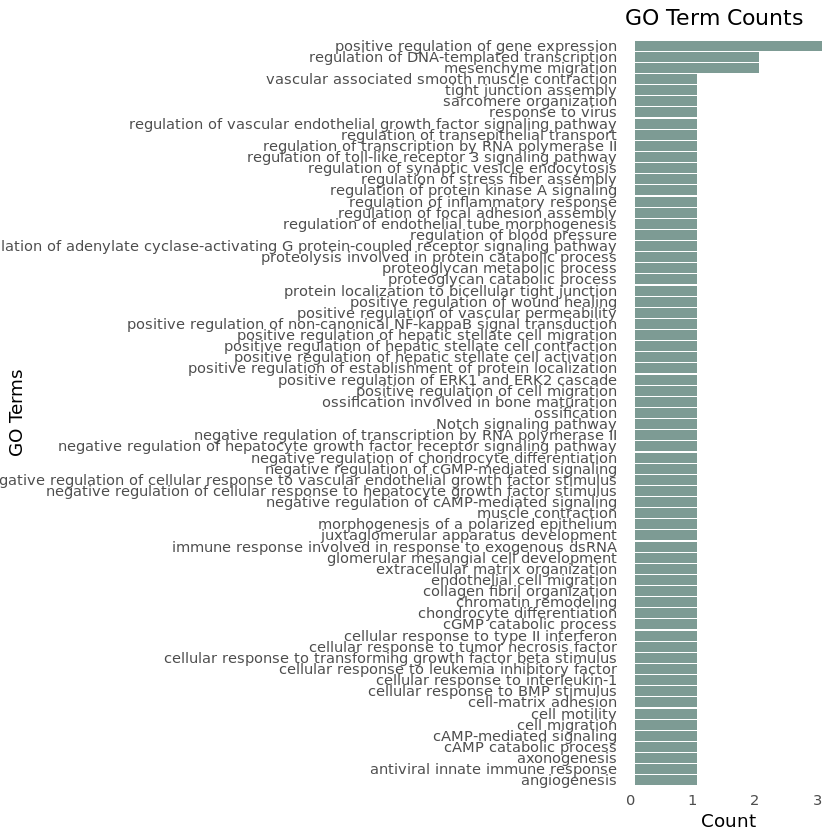

In [17]:
# Load necessary library
library(ggplot2)

# Create a data frame from the sorted term counts
GO_df <- as.data.frame(sorted_term_counts)

# Rename the columns for better readability
colnames(GO_df) <- c("Term", "Count")

# Create the bar plot with horizontal bars and right alignment
ggplot(GO_df, aes(x = reorder(Term, Count), y = Count)) +
  geom_bar(stat = "identity", fill = "#7D9B94") +
  coord_flip() +  # Flip the coordinates to make the bars horizontal
  theme_minimal() +  # Use a minimal theme for a clean look
    theme(
        panel.grid.major = element_blank(),  # Remove major grid lines
        panel.grid.minor = element_blank(),  # Remove minor grid lines
        axis.text.x = element_text(hjust = 1)  # Right alignment
      ) +
  theme(axis.text.y = element_text(hjust = 1)) +  # Align text to the right
  labs(x = "GO Terms", y = "Count", title = "GO Term Counts")  # Add labels and title

In [9]:
GO_list <- c(
  # Actg1, ENSMUSG00000062825
  "ATP binding", "hydrolase activity", "identical protein binding", "profilin binding", 
  "protein kinase binding", "structural constituent of cytoskeleton", 
  "structural constituent of postsynaptic actin cytoskeleton", "ubiquitin protein ligase binding",

  # Hcfc2, ENSMUSG00000020246
  "transcription coactivator activity", "transcription coregulator activity",

  # Pde10a, ENSMUSG00000023868
  "3',5'-cyclic-AMP phosphodiesterase activity", "3',5'-cyclic-GMP phosphodiesterase activity",
  "3',5'-cyclic-nucleotide phosphodiesterase activity", "cAMP binding", "cGMP binding", 
  "cGMP-stimulated cyclic-nucleotide phosphodiesterase activity", "cyclic-nucleotide phosphodiesterase activity", 
  "metal ion binding",

  # Acta2, ENSMUSG00000035783
  "ATP binding", "hydrolase activity", "protein kinase binding",

  # Actr1b, ENSMUSG00000037351
  "ATP binding",

  # Adamts12, ENSMUSG00000047497
  "metal ion binding", "metalloendopeptidase activity",

  # Actg2, ENSMUSG00000059430
  "ATP binding", "hydrolase activity",

  # Ptp4a3, ENSMUSG00000059895
  "protein tyrosine phosphatase activity"
)

In [10]:
# Count occurrences of each term
term_counts <- table(GO_list)

sorted_term_counts <- sort(term_counts, decreasing = TRUE)
print(sorted_term_counts)

GO_list
                                                 ATP binding 
                                                           4 
                                          hydrolase activity 
                                                           3 
                                           metal ion binding 
                                                           2 
                                      protein kinase binding 
                                                           2 
                 3',5'-cyclic-AMP phosphodiesterase activity 
                                                           1 
                 3',5'-cyclic-GMP phosphodiesterase activity 
                                                           1 
          3',5'-cyclic-nucleotide phosphodiesterase activity 
                                                           1 
                                                cAMP binding 
                                                           1 


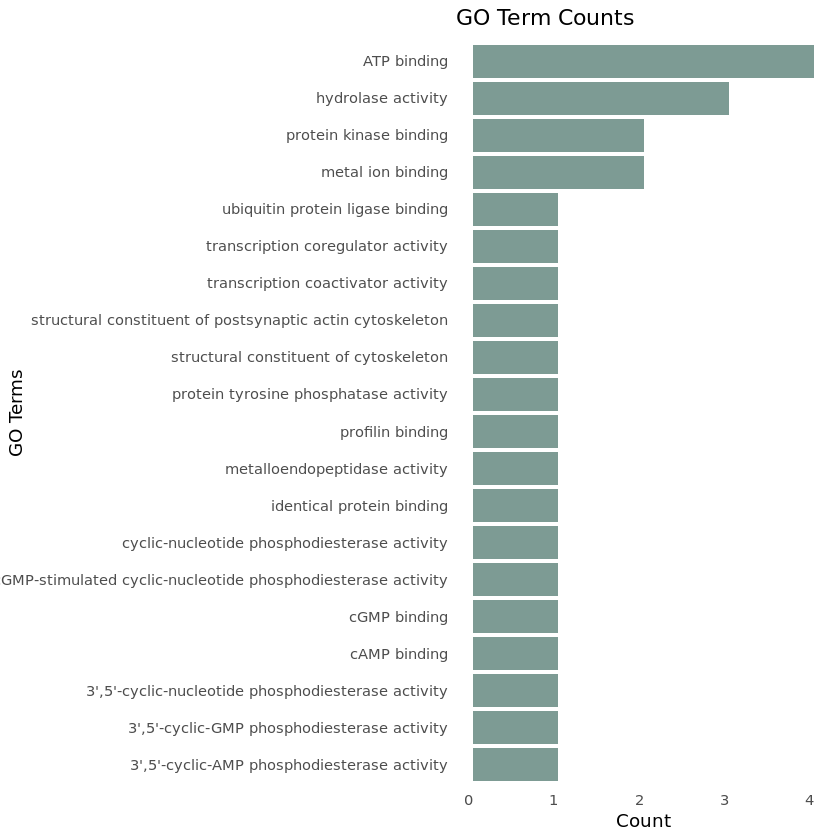

In [14]:
# Load necessary library
library(ggplot2)

# Create a data frame from the sorted term counts
GO_df <- as.data.frame(sorted_term_counts)

# Rename the columns for better readability
colnames(GO_df) <- c("Term", "Count")

# Create the bar plot with horizontal bars and right alignment
ggplot(GO_df, aes(x = reorder(Term, Count), y = Count)) +
  geom_bar(stat = "identity", fill = "#7D9B94") +
  coord_flip() +  # Flip the coordinates to make the bars horizontal
  theme_minimal() +  # Use a minimal theme for a clean look
    theme(
        panel.grid.major = element_blank(),  # Remove major grid lines
        panel.grid.minor = element_blank(),  # Remove minor grid lines
        axis.text.x = element_text(hjust = 1)  # Right alignment
      ) +
  theme(axis.text.y = element_text(hjust = 1)) +  # Align text to the right
  labs(x = "GO Terms", y = "Count", title = "GO Term Counts")  # Add labels and title